D:\DevelopmentKit\anaconda3\envs\pytorch\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\DevelopmentKit\anaconda3\envs\pytorch\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\DevelopmentKit\anaconda3\envs\pytorch\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\DevelopmentKit\anaconda3\envs\pytorch\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\DevelopmentKit\anaconda3\envs\pytorch\Lib\subprocess.py", line 1540, in _exec

Silhouette Score: 0.816132886858093


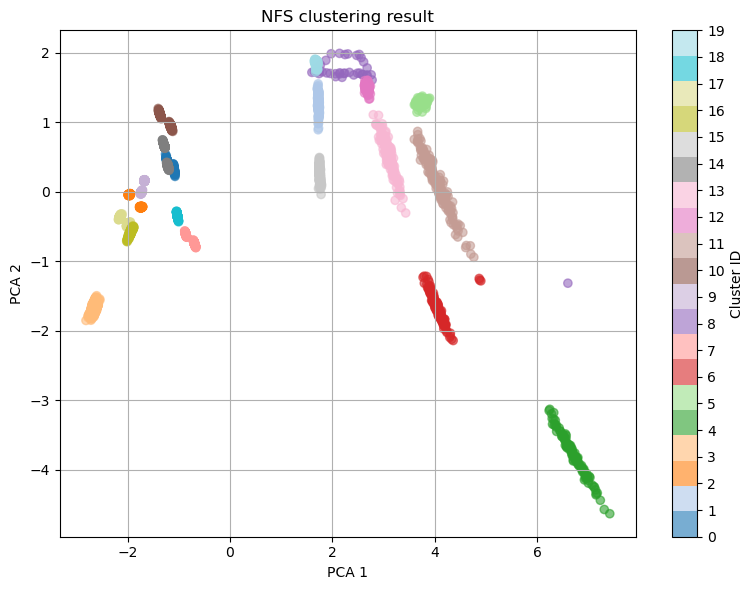

聚类完成

Cluster 0 label distribution:
  Label 11: 50.00%
  Label 14: 50.00%

Cluster 1 label distribution:
  Label 8: 100.00%

Cluster 2 label distribution:
  Label 21: 50.00%
  Label 24: 50.00%

Cluster 3 label distribution:
  Label 19: 50.00%
  Label 22: 50.00%

Cluster 4 label distribution:
  Label 1: 100.00%

Cluster 5 label distribution:
  Label 3: 100.00%

Cluster 6 label distribution:
  Label 2: 1.96%
  Label 4: 98.04%

Cluster 7 label distribution:
  Label 10: 50.00%
  Label 13: 50.00%

Cluster 8 label distribution:
  Label 1: 100.00%

Cluster 9 label distribution:
  Label 26: 50.00%
  Label 27: 50.00%

Cluster 10 label distribution:
  Label 12: 50.00%
  Label 15: 50.00%

Cluster 11 label distribution:
  Label 2: 100.00%

Cluster 12 label distribution:
  Label 6: 100.00%

Cluster 13 label distribution:
  Label 5: 100.00%

Cluster 14 label distribution:
  Label 17: 50.00%
  Label 18: 50.00%

Cluster 15 label distribution:
  Label 7: 100.00%

Cluster 16 label distribution:
  Label 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 1. 读取数据
df = pd.read_csv("../data/dataset_extended_all.csv")
df_features = df.drop(columns=["label"])  # 去掉 label 列

# 2. 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# 3. 降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 使用 KMeans 聚类
# 经过测试，n=21或n=20效果最好，这里取n=20
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

# 5. 可视化
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.6)
# plt.title("NFS clustering result")
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# plt.colorbar(scatter, label="Cluster ID")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab20', alpha=0.6)  # tab20 支持20类颜色
plt.title("NFS clustering result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# 添加 colorbar，并设置为整数刻度
cbar = plt.colorbar(scatter, ticks=range(20))  # 显示0-19整数
cbar.set_label("Cluster ID")
cbar.ax.set_yticklabels([str(i) for i in range(20)])  # 防止科学计数法等

plt.grid(True)
plt.tight_layout()
plt.show()


# 6. 保存结果
df["cluster"] = clusters
df.to_csv("./nfs_kmeans_8_clustered.csv", index=False)
print("聚类完成")

for c in sorted(df["cluster"].unique()):
    cluster_data = df[df["cluster"] == c]
    label_counts = cluster_data["label"].value_counts(normalize=True).sort_index()
    print(f"\nCluster {c} label distribution:")
    for label, ratio in label_counts.items():
        print(f"  Label {label}: {ratio:.2%}")

# 重新运行聚类分析脚本
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # 1. 读取数据
# df = pd.read_csv("../data/dataset_new_all_copy.csv")
# df_features = df.drop(columns=["label"], errors="ignore")

# # 2. 特征标准化
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_features)

# # 3. 聚类方法列表
# methods = {
#     "KMeans_6": KMeans(n_clusters=6, random_state=42),
#     "KMeans_8": KMeans(n_clusters=8, random_state=42),
#     "Agglomerative_6": AgglomerativeClustering(n_clusters=6),
#     "GMM_6": GaussianMixture(n_components=6, random_state=42),
#     "DBSCAN": DBSCAN(eps=1.2, min_samples=10),
#     "OPTICS": OPTICS(min_samples=10)
# }

# # 4. 对比聚类效果
# results = []
# for name, model in methods.items():
#     if "GMM" in name:
#         clusters = model.fit_predict(X_scaled)
#     else:
#         clusters = model.fit(X_scaled).fit_predict(X_scaled)
#     if len(set(clusters)) > 1 and len(set(clusters)) < len(X_scaled):
#         score = silhouette_score(X_scaled, clusters)
#     else:
#         score = -1  # 不合法或无效聚类
#     results.append((name, score))

# # 5. 输出结果
# results.sort(key=lambda x: x[1], reverse=True)
# print("聚类方法对比（按 Silhouette Score 排序）:")
# for name, score in results:
#     print(f"{name:<20} -> Silhouette Score: {score:.4f}")

# # 6. 可视化前两种最优聚类结果
# top2 = results[:2]
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(12, 5))
# for i, (name, _) in enumerate(top2):
#     model = methods[name]
#     if "GMM" in name:
#         clusters = model.fit_predict(X_scaled)
#     else:
#         clusters = model.fit(X_scaled).fit_predict(X_scaled)
#     plt.subplot(1, 2, i + 1)
#     plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=10, alpha=0.7)
#     plt.title(f"{name} 聚类结果")
#     plt.xlabel("PCA 1")
#     plt.ylabel("PCA 2")
#     plt.grid(True)

# plt.tight_layout()
# plt.show()
